In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [14]:
# Load and encode
df = pd.read_csv('semih_gaming_analytics.csv')
le = LabelEncoder()
categorical_cols = ['Gender', 'GameGenre', 'GameDifficulty', 'EngagementLevel', 'Location']
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [15]:
# Define churn
X = df.drop(['EngagementLevel', 'PlayerID'], axis=1)
y = (df['EngagementLevel'] > 0).astype(int)  # 1 = churned, 0 = active
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature Engineering
X_train['TotalPlayTime'] = X_train['PlayTimeHours'] * X_train['SessionsPerWeek']
X_test['TotalPlayTime'] = X_test['PlayTimeHours'] * X_test['SessionsPerWeek']
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]

In [17]:
# Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
print(f"Churn Prediction Accuracy: {model.score(X_test, y_test):.2f}")
print("Feature Coefficients:\n", pd.Series(model.coef_[0], index=X_train.columns))
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))

Churn Prediction Accuracy: 0.88
Feature Coefficients:
 Age                          0.003621
Gender                       0.016123
Location                     0.005990
GameGenre                    0.011793
PlayTimeHours               -0.003203
InGamePurchases             -0.061746
GameDifficulty               0.000162
SessionsPerWeek             -0.355408
AvgSessionDurationMinutes   -0.038752
PlayerLevel                 -0.003330
AchievementsUnlocked        -0.007744
progression_rate             0.003858
TotalPlayTime               -0.000012
dtype: float64

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80      2035
           1       0.97      0.87      0.92      5972

    accuracy                           0.88      8007
   macro avg       0.84      0.89      0.86      8007
weighted avg       0.90      0.88      0.89      8007



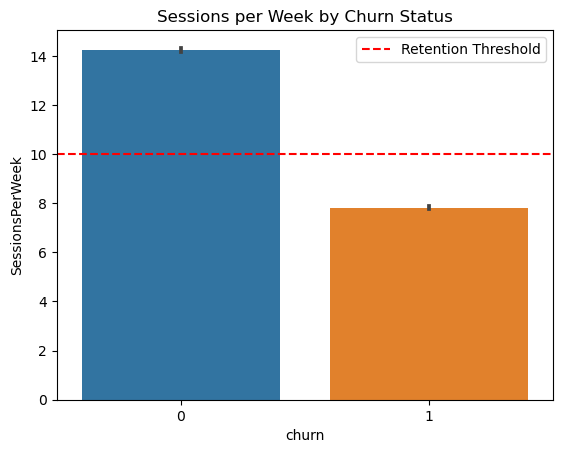

In [18]:
# Visual
sns.barplot(x='churn', y='SessionsPerWeek', data=df.assign(churn=(df['EngagementLevel'] > 0).astype(int)))
plt.axhline(y=10, color='r', linestyle='--', label='Retention Threshold')
plt.title('Sessions per Week by Churn Status')
plt.legend()
plt.savefig('churn_by_sessions_with_threshold.png')
plt.show()